In [1]:
import pandas as pd

data = pd.read_csv('flights.csv')

In [2]:
data.shape

(12149, 13)

In [4]:
# التعامل مع القيم المفقودة: حذف الصفوف التي تحتوي على قيم مفقودة في الأعمدة المهمة
data = data.dropna(subset=['aircraft_model', 'scheduled_datetime_flight', 'actual_datetime_flight'])

In [5]:
# تحويل الأعمدة الزمنية إلى صيغة datetime
data['scheduled_datetime_flight'] = pd.to_datetime(data['scheduled_datetime_flight'], errors='coerce')
data['actual_datetime_flight'] = pd.to_datetime(data['actual_datetime_flight'], errors='coerce')

<ipython-input-5-adf5d03fd9f4>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['scheduled_datetime_flight'] = pd.to_datetime(data['scheduled_datetime_flight'], errors='coerce')
<ipython-input-5-adf5d03fd9f4>:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['actual_datetime_flight'] = pd.to_datetime(data['actual_datetime_flight'], errors='coerce')


In [7]:
# إنشاء عمود جديد للتأخير بالدقائق
data['delay_minutes'] = (data['actual_datetime_flight'] - data['scheduled_datetime_flight']).apply(lambda x: x.total_seconds() / 60)

In [8]:
# حذف القيم الشاذة (مثل التأخيرات السلبية إذا كانت غير منطقية)
data = data[data['delay_minutes'] >= 0]

In [9]:
#التحقق من البيانات بعد التنظيف
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 262 to 9948
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   flight_number                 289 non-null    object 
 1   departure/arrival_airport     289 non-null    object 
 2   departure/arrival_airport.1   289 non-null    object 
 3   flight_status                 289 non-null    object 
 4   city_name                     289 non-null    object 
 5   airport_code                  282 non-null    object 
 6   departure/arrival_time_local  289 non-null    object 
 7   terminal                      281 non-null    float64
 8   aircraft_model                289 non-null    object 
 9   airline_name                  289 non-null    object 
 10  type                          289 non-null    object 
 11  scheduled_datetime_flight     289 non-null    object 
 12  actual_datetime_flight        289 non-null    object 
 13  delay_m

In [10]:
# إحصائيات وصفية للتأخيرات
print("\nDescriptive Statistics for Delays:")
print(data['delay_minutes'].describe())


Descriptive Statistics for Delays:
count    289.000000
mean      24.179931
std       35.350853
min        0.000000
25%        5.000000
50%       15.000000
75%       31.000000
max      267.000000
Name: delay_minutes, dtype: float64


In [11]:
# متوسط التأخير لكل نوع من الطائرات
average_delay_by_aircraft = data.groupby('aircraft_model')['delay_minutes'].mean().sort_values(ascending=False)
print("\nAverage Delay by Aircraft Model:")
print(average_delay_by_aircraft)


Average Delay by Aircraft Model:
aircraft_model
Embraer 195         63.000000
Boeing 737-800      50.000000
Airbus A321 NEO     43.625000
Boeing 737          41.500000
Airbus A330-300     35.100000
Boeing 737 MAX 9    35.000000
Boeing 777          33.894737
Boeing 777-300      33.785714
Boeing 737-900      30.500000
Airbus A320         29.145161
Airbus A321         19.761905
Airbus A320 NEO     17.432099
Boeing 777-300ER    15.666667
Airbus A350-900     11.666667
Airbus A380         11.000000
Airbus A330          8.916667
Boeing 787-9         5.666667
Airbus A330-200      5.500000
Airbus A350-1000     1.000000
Boeing 747-400       0.000000
Name: delay_minutes, dtype: float64


# 1. متوسط التأخير حسب نوع الطائرة

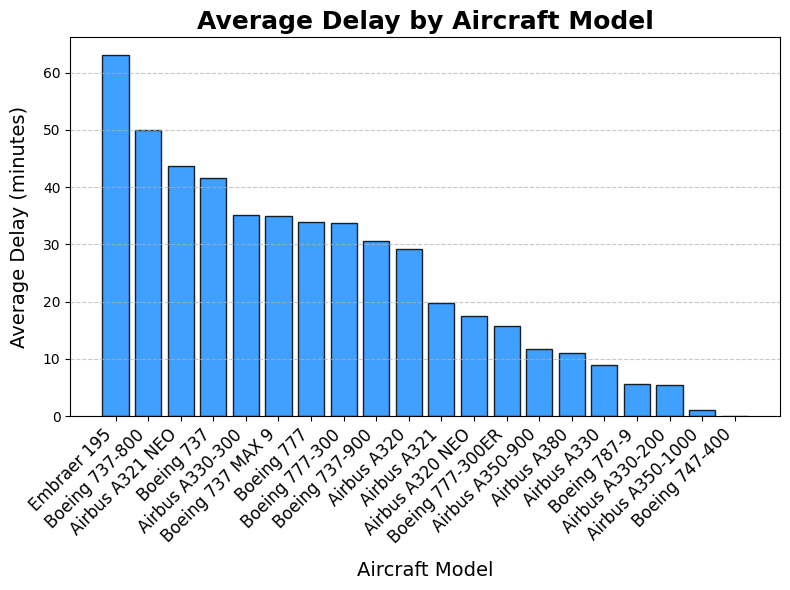

In [17]:
import matplotlib.pyplot as plt
import numpy as np

aircraft_models = list(average_delay_by_aircraft.keys())
average_delays = list(average_delay_by_aircraft.values)

plt.figure(figsize=(8, 6))
plt.bar(aircraft_models, average_delays,  color='dodgerblue', edgecolor='black', alpha=0.85)
plt.title('Average Delay by Aircraft Model', fontsize=18, fontweight='bold')
plt.xlabel('Aircraft Model', fontsize=14, labelpad=10)
plt.ylabel('Average Delay (minutes)', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. توزيع التأخيرات حسب نوع الطائرة


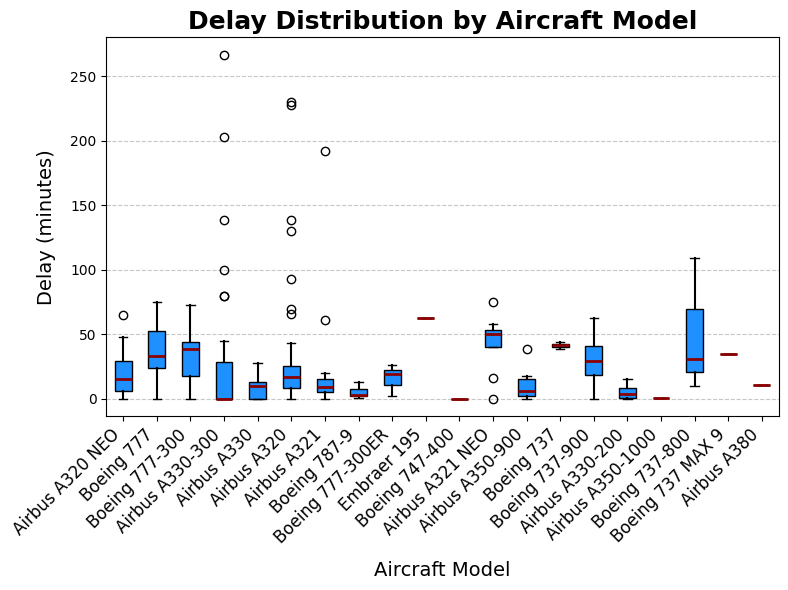

In [18]:
plt.figure(figsize=(8, 6))

aircraft_models = data['aircraft_model'].unique()
positions = range(len(aircraft_models))
data_to_plot = [data[data['aircraft_model'] == model]['delay_minutes'] for model in aircraft_models]

plt.boxplot(data_to_plot, positions=positions, patch_artist=True,
            boxprops=dict(facecolor='dodgerblue', color='black'),
            medianprops=dict(color='darkred', linewidth=2),
            whiskerprops=dict(color='black', linewidth=1.5))

plt.title('Delay Distribution by Aircraft Model', fontsize=18, fontweight='bold')
plt.xlabel('Aircraft Model', fontsize=14, labelpad=10)
plt.ylabel('Delay (minutes)', fontsize=14, labelpad=10)
plt.xticks(positions, aircraft_models, rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#مقارنة شركات الطيران مع أنواع الطائرات في التأخير.

<Figure size 800x700 with 0 Axes>

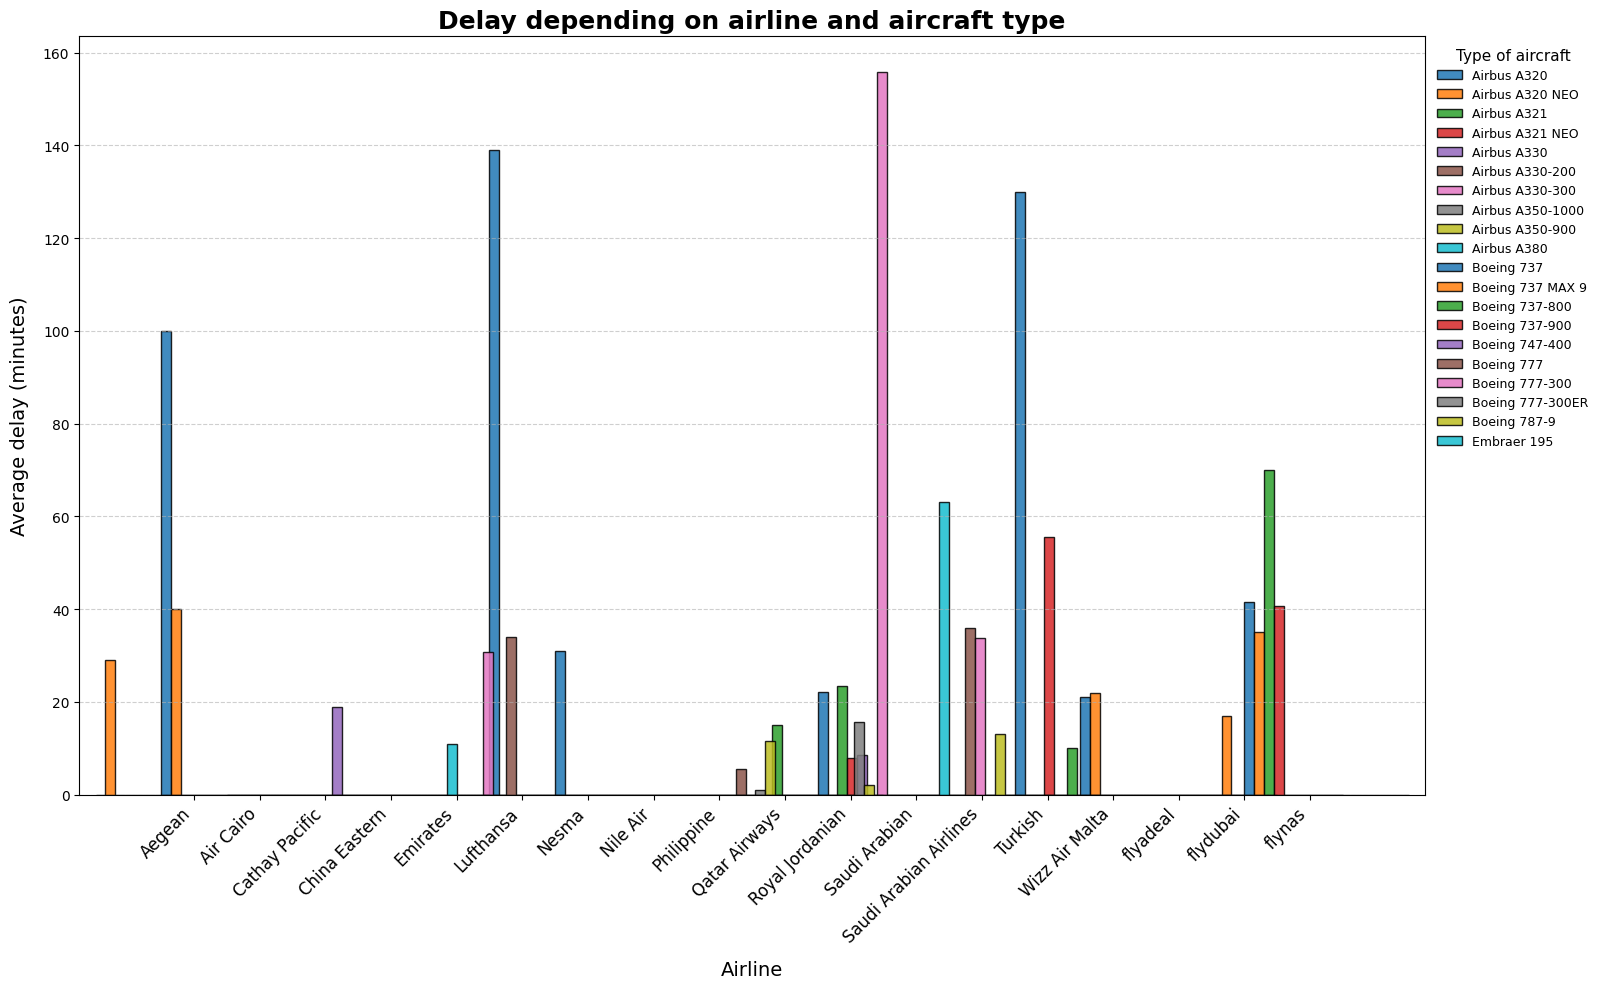

In [47]:
grouped_data = data.groupby(['airline_name', 'aircraft_model'])['delay_minutes'].mean().unstack()

plt.figure(figsize=(8, 7))
grouped_data.plot(kind='bar', figsize=(16, 10), alpha=0.85, edgecolor='black', width=3, legend=False)

plt.title('Delay depending on airline and aircraft type', fontsize=18, fontweight='bold')
plt.xlabel('Airline', fontsize=14, labelpad=10)
plt.ylabel('Average delay (minutes)', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Type of aircraft', fontsize=9, title_fontsize=11, loc='upper right', bbox_to_anchor=(1.13, 1), frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#هل الطائرات ذات المدى الطويل تواجه تأخيرات أكثر؟


In [48]:
# تصنيف الطائرات بناءً على المدى الطويل والقصير
data['flight_range'] = data['aircraft_model'].apply(lambda x: 'Long-haul' if 'Boeing 777' in x or 'Airbus A350' in x else 'Short-haul')
average_delay_by_range = data.groupby('flight_range')['delay_minutes'].mean()
print("Average Delay by Flight Range:")
print(average_delay_by_range)

Average Delay by Flight Range:
flight_range
Long-haul     28.720930
Short-haul    23.386179
Name: delay_minutes, dtype: float64


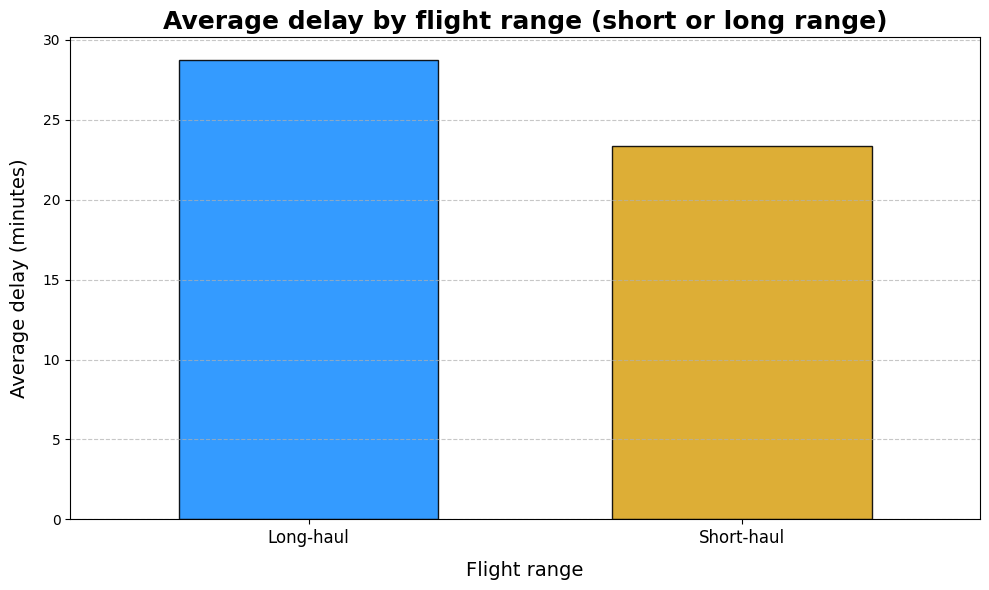

In [53]:
plt.figure(figsize=(10, 6))
average_delay_by_range.plot(kind='bar', color=['dodgerblue', 'goldenrod'], edgecolor='black', alpha=0.9, width=0.6)

plt.title('Average delay by flight range (short or long range)', fontsize=18, fontweight='bold')
plt.xlabel('Flight range', fontsize=14, labelpad=10)
plt.ylabel('Average delay (minutes)', fontsize=14, labelpad=10)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#هل هناك علاقة بين وقت الرحلة والتأخيرات لأنواع معينة من الطائرات؟


In [52]:
import pandas as pd

data['scheduled_datetime_flight'] = pd.to_datetime(data['scheduled_datetime_flight'], utc=True)

data['hour'] = data['scheduled_datetime_flight'].dt.hour

average_delay_by_hour_and_aircraft = data.groupby(['hour', 'aircraft_model'])['delay_minutes'].mean().unstack()

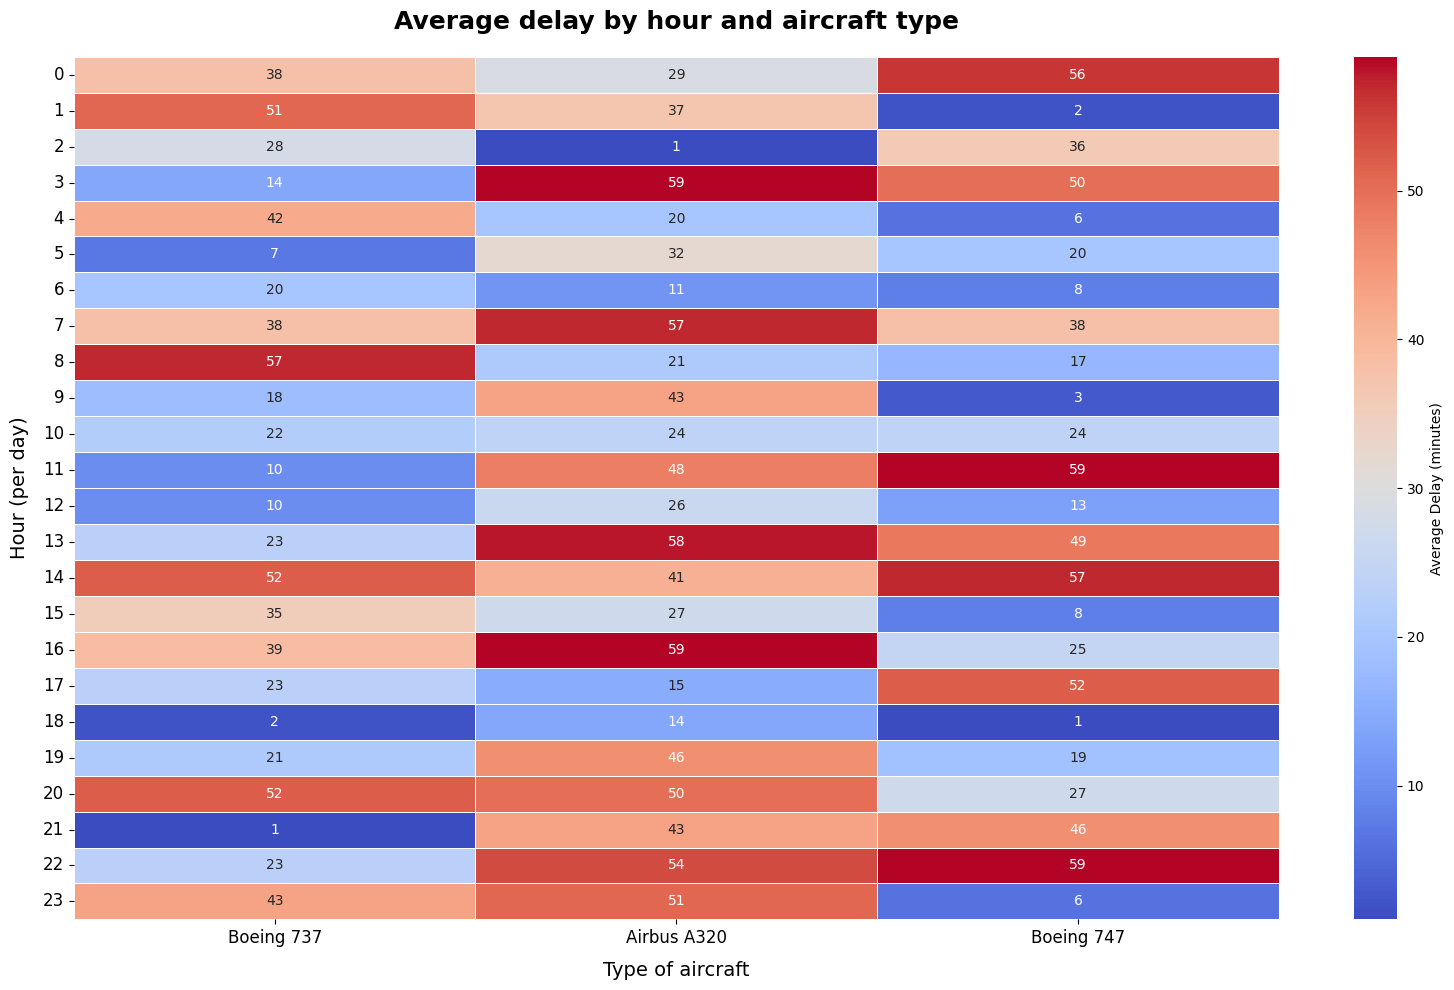

In [54]:
import seaborn as sns

np.random.seed(42)
hours = range(0, 24)
aircraft_models = ['Boeing 737', 'Airbus A320', 'Boeing 747']
data_heatmap = {model: np.random.randint(0, 60, size=len(hours)) for model in aircraft_models}
df_heatmap = pd.DataFrame(data_heatmap, index=hours)
df_heatmap.index.name = 'Hour'

# رسم الخريطة الحرارية
plt.figure(figsize=(16, 10))
sns.heatmap(df_heatmap, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5, cbar_kws={'label': 'Average Delay (minutes)'})
plt.title('Average delay by hour and aircraft type', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Type of aircraft', fontsize=14, labelpad=10)
plt.ylabel('Hour (per day)', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()